# FORESEE - Massive spin-2 mediator

In [1]:
import numpy as np
import sys
import os

src_path = "../../src"
sys.path.append(src_path)
from foresee import Foresee, Utility, Model

from main import sigma_gNucleus_G2Nucleus_analyt, sigma_G2Nucleus_gNucleus_analyt, sigma_ge_G2e_analyt, sigma_G2e_ge_analyt
from constants import *


from matplotlib import pyplot as plt
import matplotlib.tri as tri

plt.rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 400

plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
plt.rcParams['text.latex.preamble'] = [r"\usepackage{amssymb}"]
plt.rcParams['text.latex.preamble'] = [r"\usepackage{siunitx}"]
font = {'family': 'serif', 'serif': ['computer modern roman']}

plt.rc('font', **font)

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

/usr/local/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/var/folders/n1/6dc0crm51sg3856h4052rs9r0000gq/T/ipykernel_35635/276799012.py:19: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
/var/folders/n1/6dc0crm51sg3856h4052rs9r0000gq/T/ipykernel_35635/276799012.py:20: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble'] = [r"\usepackage{amssymb}"]
/var/folders/n1/6dc0crm51sg3856h4052rs9r0000gq/T/ipykernel_35635/276799012.py:2

## 1. Initialization 

In [2]:
foresee = Foresee()

energy = "14"
modelname = "Spin2_massive"
model = Model(modelname)

nsample = 10

num_of_masses_MATHUSLA = 21
masses_MATHUSLA = [float(x) for x in ['{:0.4e}'.format(m) for m in np.logspace(-3, -0.5, num_of_masses_MATHUSLA)]]

num_of_couplings = 32

#### Add mesons decays


\begin{equation} 
	\begin{aligned}
		\!\!\text{Spin-2:}\
			&\frac{{\rm BR}_{V \rightarrow \gamma G_2}}{{\rm BR}_{V \rightarrow ee}} \!=\! \frac{ g^2 \left(M^2-m_G^2\right)^3}{8 \pi  \alpha_{\text{EM}} \Lambda^2 M \sqrt{M^2-4 m_e^2} \left(M^2+2 m_e^2\right)}, \!\! \\
	\end{aligned}
\end{equation} 

In [3]:
# V(p0) -> gamma(p1) + G2(p2)
# p1**2 = m1**2 = 0
# p2**2 = m2**2 = m_G2**2

model.add_production_2bodydecay(
    pid0 = "113", # rho
    pid1 = "0",   # pid1 = 0 means mass_pid1 = m1 = mass_llp0;   mass_pid2 = m2 = mass = mass_llp1
    br = "4.72e-5 * coupling**2 * (1 * (m0**2 - m2**2)**3) / (8. * ALPHAEM * m0 * np.sqrt(m0**2 - 4*M_ELECTRON**2) * (m0**2 + 2*M_ELECTRON**2) * np.pi)",
    generator = "EPOSLHC",
    energy = energy,
    nsample = nsample,
)

model.add_production_2bodydecay(
   pid0 = "223", # omega
   pid1 = "0",
   br = "7.38e-5 * coupling**2 * (1 * (m0**2 - m2**2)**3) / (8. * ALPHAEM * m0 * np.sqrt(m0**2 - 4*M_ELECTRON**2) * (m0**2 + 2*M_ELECTRON**2) * np.pi)",
   generator = "EPOSLHC",
   energy = energy,
   nsample = nsample,
)

model.add_production_2bodydecay(
   pid0 = "333", # phi
   pid1 = "0",
   br = "2.98e-4 * coupling**2 * (1 * (m0**2 - m2**2)**3) / (8. * ALPHAEM * m0 * np.sqrt(m0**2 - 4*M_ELECTRON**2) * (m0**2 + 2*M_ELECTRON**2) * np.pi)",
   generator = "EPOSLHC",
   energy = energy,
   nsample = nsample,
)

model.add_production_2bodydecay(
    pid0 = "443", # J/ψ
    pid1 = "0",
    br = "0.0597 * coupling**2 * (1 * (m0**2 - m2**2)**3) / (8. * ALPHAEM * m0 * np.sqrt(m0**2 - 4*M_ELECTRON**2) * (m0**2 + 2*M_ELECTRON**2) * np.pi)",
    generator = "Pythia8",
    energy = energy,
    nsample = nsample,
)

model.add_production_2bodydecay(
   pid0 = "100443", # \psi(2S)
   pid1 = "0",
   br = "0.00993 * coupling**2 * (1 * (m0**2 - m2**2)**3) / (8. * ALPHAEM * m0 * np.sqrt(m0**2 - 4*M_ELECTRON**2) * (m0**2 + 2*M_ELECTRON**2) * np.pi)",
   generator = "Pythia8",
   energy = energy,
   nsample = nsample,
)

# model.add_production_2bodydecay(
#     pid0 = "553", # Υ ($\Upsilon(1S)$)
#     pid1 = "0",
#     br = "0.0238 * coupling**2 * (1 * (m0**2 - m2**2)**3) / (8. * ALPHAEM * m0 * np.sqrt(m0**2 - 4*M_ELECTRON**2) * (m0**2 + 2*M_ELECTRON**2) * np.pi)",
#     generator = "Pythia8",
#     energy = energy,
#     nsample = nsample,
# )

# model.add_production_2bodydecay(
#    pid0 = "100553", # $\Upsilon(2S)$
#    pid1 = "0",
#    br = "0.0191 * coupling**2 * (1 * (m0**2 - m2**2)**3) / (8. * ALPHAEM * m0 * np.sqrt(m0**2 - 4*M_ELECTRON**2) * (m0**2 + 2*M_ELECTRON**2) * np.pi)",
#    generator = "Pythia8",
#    energy = energy,
#    nsample = nsample,
# )

# model.add_production_2bodydecay(
#    pid0 = "200553", # $\Upsilon(3S)$
#    pid1 = "0",
#    br = "0.0218 * coupling**2 * (1 * (m0**2 - m2**2)**3) / (8. * ALPHAEM * m0 * np.sqrt(m0**2 - 4*M_ELECTRON**2) * (m0**2 + 2*M_ELECTRON**2) * np.pi)",
#    generator = "Pythia8",
#    energy = energy,
#    nsample = nsample,
# )

In [4]:
model.set_ctau_1d(filename="model/ctau_G2.txt", coupling_ref=1)

branchings = [
    [ "BR_G2_gg", "black", "solid", r"$\gamma\gamma$", 0.110, 0.8 ],  
    [ "BR_G2_ee", "red", "solid",  r"$e^+ e^-$", 0.110, 0.056],
    [ "BR_G2_mumu", "green", "solid",  r"$\mu^+ \mu^-$", 0.320, 0.056],
]

model.set_br_1d(
    modes=[channel for channel, _, _, _, _, _ in branchings],
    filenames=[ "model/br/" + channel + ".txt" for channel, _, _, _, _, _ in branchings ], )


foresee.set_model(model=model)

In [7]:
# # For Mathusla, there is no Primakoff production - only meson decays!
# from timeit import default_timer as timer

# count_total = num_of_masses_MATHUSLA
# for count, mass in enumerate(masses_MATHUSLA):
#     mass_llp0 = 0.0    # photon
#     mass_llp1 = mass   # G2

#     start = timer()
#     foresee.get_llp_spectrum(mass=mass, mass_llp0=mass_llp0, coupling=1, detector="MATHUSLA")
#     end = timer()
#     time_length_sec = end - start

#     count += 1
#     time_length_sec_total = time_length_sec * count_total
#     print("%.2f%% done, " % float(count/count_total * 100), "approx. total run time : %.1f m, " % float(time_length_sec_total/60), "approx. waiting time: %.1f m" % float(time_length_sec_total * (1 - count / count_total) / 60))

In [8]:
# For FASER, there is both Primakoff production and meson decays

num_of_masses = 31
masses = [float(x) for x in ['{:0.4e}'.format(m) for m in np.logspace(-3,1,num_of_masses)]]
masses = np.array(masses)

In [9]:
model.add_production_direct(
    label = "Prim",
    energy = energy,
    coupling_ref=1,
    masses=masses,
)

In [10]:
# from timeit import default_timer as timer

# for count, mass in enumerate(masses):
#     mass_llp0 = 0.0    # photon
#     mass_llp1 = mass   # G2

#     start = timer()

#     foresee.get_llp_spectrum(mass=mass_llp1, mass_llp0=mass_llp0, coupling=1)
    
#     end = timer()
#     time_length_sec = end - start

#     count += 1
#     time_length_sec_total = time_length_sec * num_of_masses
#     print("%.2f%% done, " % float(count / num_of_masses * 100), "approx. total run time : %.1f m, " % float(time_length_sec_total / 60), "approx. waiting time: %.1f m" % float(time_length_sec_total * (1 - count / num_of_masses) / 60))

In [11]:
# productions = [
#     ["Prim"    , None     , "green"    ,    r"Prim."    ,'-'     ],   
#     # ["111"    , None      , "firebrick"   , r"$\pi$"      ,'-'   ],   
#     # ["221"    , None      , "red"         , r"$\eta$" ,'-'       ],   
#     # ["331"    , None , "salmon"      , r"$\eta'$"  ,'-'     ],  
#     ["113"    , None , "dodgerblue"  , r"$\rho$"   ,'-'     ],   
#     ["223"    , None , "blue"        , r"$\omega$"   ,'-'   ],   
#     ["333"    , None , "deepskyblue" , r"$\phi$"   ,'-'     ],  
#     ["443"    , None  , "gold"        , r"$J/\psi$"  ,'-'    ],   
#     ["100443" , None  , "orange"      , r"$\psi(2S)$" ,'-'   ],  
#     # ["553"    , None  , "green"       , r"$\Upsilon(1S)$",'-'],   
#     # ["100553" , None  , "limegreen"   , r"$\Upsilon(2S)$",'-'],  
#     # ["200553" , None  , "lime"        , r"$\Upsilon(3S)$",'-'],  
# ]


# plot = foresee.plot_production(
#     masses = masses, 
#     productions = productions,
#     condition="True", 
#     xlims=[0.03,3],
#     ylims=[10**2,10**10], 
#     xlabel=r"$m_G$ [GeV]", 
#     ylabel=r"Production rate $\sigma \times g_\gamma^2$ [pb]",
#     legendloc=(1.02,1.02),
#     fs_label=12,
#     dolegend=True,
# )


# plot.subplots_adjust(left=0.12, right=0.96, bottom=0.12, top=0.97)
# plot.savefig("output/G2_Production_channels_FASER.pdf")
# plot.show()

### Primary production

In [10]:
luminosity, distance = 3000, 480 - 140
setup, selection, channels, length = "FASER2_gg", "np.sqrt(x.x**2 + x.y**2)< 1*340/480", [ "BR_G2_gg" ], 5
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings))
    list_nevents.append(nevents)
    # print(nevents)
np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

/usr/local/anaconda3/lib/python3.9/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [11]:
luminosity, distance = 3000, 480 - 140
setup, selection, channels, length = "FASER2_ee", "np.sqrt(x.x**2 + x.y**2)< 1*340./480.", [ "BR_G2_ee" ], 5
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings))
    list_nevents.append(nevents)
np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [12]:
luminosity, distance = 3000, 480 - 140
setup, selection, channels, length = "FASER2_mumu", "np.sqrt(x.x**2 + x.y**2)< 1*340./480.", [ "BR_G2_mumu" ], 5
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings))
    list_nevents.append(nevents)
np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [13]:
luminosity, distance = 3000, 480 - 140 - 2  # L=2m
setup, selection, channels, length = "FASERnu2_gg", "np.sqrt(x.x**2 + x.y**2)< 0.25*340/480", [ "BR_G2_gg" ], 2
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events( mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings), preselectioncuts="th<0.01 and p>1000")
    list_nevents.append(nevents)

np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [14]:
luminosity, distance = 3000, 480 - 140 - 2
setup, selection, channels, length = "FASERnu2_ee", "np.sqrt(x.x**2 + x.y**2)< 0.25*340./480.", [ "BR_G2_ee" ], 2
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings), preselectioncuts="th<0.01 and p>1000")
    list_nevents.append(nevents)
np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [15]:
luminosity, distance = 3000, 480 - 140 - 2  # L=2m
setup, selection, channels, length = "FASERnu2_photon_conversion", "np.sqrt(x.x**2 + x.y**2)< 0.25*340/480", [ "BR_G2_gg" ], 2
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events_secondary_NOFPF(
        mass=mass,
        energy=energy,
        couplings=np.logspace(-8, -2, num_of_couplings),
        preselectioncuts="th<0.01 and p>1000",
        which_LLP="llp1",
        sign="photon_conversion",  
        coup_ref=1,        
        m1=mass,
        m3=0.0,
        Z=Z_TUNGSTEN,
        A=A_TUNGSTEN,
        RHO=RHO_TUNGSTEN,
        sigma_secondary_LLP2_LLP3=sigma_G2Nucleus_gNucleus_analyt,
    )
    list_nevents.append(nevents)
    # print(mass, nevents)

np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

- MATHUSLA setup with decay  $G_2 \to e^+ e^-$

In [52]:
len(masses_MATHUSLA)

21

In [68]:
# num_of_couplings_MATHUSLA = 99
num_of_couplings_MATHUSLA = 401


luminosity = 3000
setup, channels = "MATHUSLA_ee", ["BR_G2_ee"]

foresee.set_detector( length=0.0, channels=channels, distance=0.0, luminosity=luminosity)  # for MATHUSLA, we need to modify the foresee code


list_nevents = []
# for mass in masses_MATHUSLA:
for mass in masses_MATHUSLA[::1]:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy, couplings=np.logspace(-6, -3, num_of_couplings_MATHUSLA), preselectioncuts="p>2", detector="MATHUSLA")
    list_nevents.append(nevents)
# np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses_MATHUSLA, couplings, list_nevents])
np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses_MATHUSLA[::1], couplings, list_nevents])

### FPF

In [17]:
luminosity, distance = 3000, 620 - 140
setup, selection, channels, length = "FPF_FASER2_gg", "np.sqrt(x.x**2 + x.y**2)< 1*480/620", [ "BR_G2_gg" ], 25
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings))
    list_nevents.append(nevents)
np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [18]:
luminosity, distance = 3000, 620 - 140
setup, selection, channels, length = "FPF_FASER2_ee", "np.sqrt(x.x**2 + x.y**2)< 1*480/620", [ "BR_G2_ee" ], 25
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings))
    list_nevents.append(nevents)
np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [19]:
luminosity, distance = 3000, 620 - 140
setup, selection, channels, length = "FPF_FASER2_mumu", "np.sqrt(x.x**2 + x.y**2)< 1*480/620", [ "BR_G2_mumu" ], 25
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events(mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings))
    list_nevents.append(nevents)
np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [20]:
luminosity, distance = 3000, 620 - 140 - 8  # L=8m
setup, selection, channels, length = "FPF_FASERnu2_gg", "np.sqrt(x.x**2 + x.y**2)< 0.2*472/620", [ "BR_G2_gg" ], 8
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events( mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings), preselectioncuts="th<0.01 and p>1000")
    list_nevents.append(nevents)

np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [21]:
luminosity, distance = 3000, 620 - 140 - 8  # L=8m
setup, selection, channels, length = "FPF_FASERnu2_ee", "np.sqrt(x.x**2 + x.y**2)< 0.2*472/620", [ "BR_G2_ee" ], 8
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events( mass=mass, energy=energy, couplings=np.logspace(-8, -2, num_of_couplings), preselectioncuts="th<0.01 and p>1000")
    list_nevents.append(nevents)

np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [22]:
luminosity, distance = 3000, 620 - 140 - 8  # L=8m
setup, selection, channels, length = "FPF_FASERnu2_photon_conversion", "np.sqrt(x.x**2 + x.y**2)< 0.2*472/620", [ "BR_G2_gg" ], 8
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    # couplings, _, nevents, _, _ = foresee.get_events_secondary_FPF(
    couplings, _, nevents, _, _ = foresee.get_events_secondary_NOFPF(
        mass=mass,
        energy=energy,
        couplings=np.logspace(-8, -2, num_of_couplings),
        preselectioncuts="th<0.01 and p>1000",
        which_LLP="llp1",
        sign="photon_conversion",  
        coup_ref=1,        
        m1=mass,
        m3=0.0,
        Z=Z_TUNGSTEN,
        A=A_TUNGSTEN,
        RHO=RHO_TUNGSTEN,
        sigma_secondary_LLP2_LLP3=sigma_G2Nucleus_gNucleus_analyt,
    )
    list_nevents.append(nevents)

np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

In [23]:
luminosity, distance = 3000, 600
setup, selection, channels, length = "FPF_FLARE_photon_conversion", "np.sqrt(x.x**2 + x.y**2)< 0.5", [ "BR_G2_gg" ], 7
foresee.set_detector(length=length,
                     selection=selection,
                     channels=channels,
                     distance=distance,
                     luminosity=luminosity)


list_nevents = []
for mass in masses:
    couplings, _, nevents, _, _ = foresee.get_events_secondary_FPF(
        mass=mass,
        energy=energy,
        couplings=np.logspace(-8, -2, num_of_couplings),
        preselectioncuts="th<0.01 and p>1",
        which_LLP="llp1",
        sign="photon_conversion",  
        coup_ref=1,
        m1=0.0,
        m3=mass,
        Z=Z_LAr,
        A=A_LAr,
        RHO=RHO_LAr,
        sigma_secondary_LLP2_LLP3=sigma_G2Nucleus_gNucleus_analyt,
    )
    list_nevents.append(nevents)
np.save("model/results/" + energy + "TeV_" + setup + ".npy", [masses, couplings, list_nevents])

## 3. Plot the Results

In [12]:
setups = [
    [ "14TeV_FASER2_gg.npy", r"FASER2 ($E_{\gamma\gamma}> 0.1$ TeV)", "black", "solid", 0., 3.0 ], 
    [ "14TeV_FASER2_ee.npy", r"FASER2 ($E_{e^+ e^-}> 0.1$ TeV)", "red", "solid", 0., 3.0 ], 
    [ "14TeV_FASER2_mumu.npy", r"FASER2 ($E_{\mu^+ \mu^-}> 0.1$ TeV)", "green", "solid", 0., 3.0 ], 

    [ "14TeV_FASERnu2_photon_conversion.npy", r"FASER$\nu$2 ($G_2 \to \gamma$, $E_{\gamma}> 1$ TeV)", "gold", "solid", 0., 3 ],

    [ "14TeV_MATHUSLA_ee.npy", r"MATHUSLA ($E_{e^+ e^-}> 2$ GeV)", "brown", "solid", 0., 3],

    # [ "0.4TeV_CHARM_gg.npy", r"CHARM_gg", "purple", "solid", 0., 20 * 2 ],
    # [ "0.4TeV_CHARM_ee.npy", r"CHARM_ee", "purple", "dashed", 0., 2.3 / 0.05 ],
    
    [ "0.4TeV_SHiP_gg.npy", r"SHiP ($E_{\gamma \gamma}> 2$ GeV)", "darkgreen", "dashed", 0., 3 * 2 ],
    # [ "0.4TeV_SHiP_ee.npy", r"SHiP ($E_{e^+ e^-}> 2$ GeV)", "darkgreen", "dashed", 0., 3 * 3 ],
    # [ "0.4TeV_SHiP_mumu.npy", r"SHiP mumu", "green", "dotted", 0., 3 ],

    # [ "0.4TeV_NA62_gg.npy", r"NA62 ($E_{\gamma \gamma}> 3$ GeV)", "orange", "dashed", 0., 3.6 * 6],
    [ "0.4TeV_NA62_gg.npy", r"NA62 ($E_{\gamma \gamma}> 3$ GeV)", "orange", "dashed", 0., 3.6],

    # [ "0.069TeV_NuCal_gg.npy", r"NuCal_gg", "gray", "dashed", 0., 3.6/0.7 * 2.5],
    # [ "0.069TeV_NuCal_ee.npy", r"NuCal_ee", "gray", "dotted", 0., 3.6/0.7 * 2.5],

    # [ "0.45TeV_NOMAD_gg.npy", r"NOMAD_gg", "gray", "dotted", 0., 3.6 * 6],

    [ "0.12TeV_SeaQuest_gg.npy", r"SeaQuest ($E_{\gamma \gamma}> 3$ GeV)", "yellow", "dashed", 0., 3.6],
]

In [23]:
bounds = [
    ["BABAR.txt", "BaBar", 0.60215, 3.3e-5, 0],
    ["BABAR_invisible.txt", "BaBar (inv.)", 0.60215, 25.0e-5, 0],
    ["0.069TeV_NuCal_gg.npy.txt", "NuCal", 0.15, 1.99e-6, -22],
    ["0.4TeV_CHARM_gg.npy.txt", "CHARM", 0.059, 4.7e-6, -23],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [24]:
projections = [
    [ "M3.txt", "forestgreen", "M3 (inv.)", 1.00285, 16e-5, 0 ],
    [ "LDMX.txt", "blue", "LDMX (inv.)", 1.00285, 3.15e-5, 0 ],
    [ "NA64mu.txt", "red", "NA64mu (inv.)", 1.00285, 2e-5, 0 ],
]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

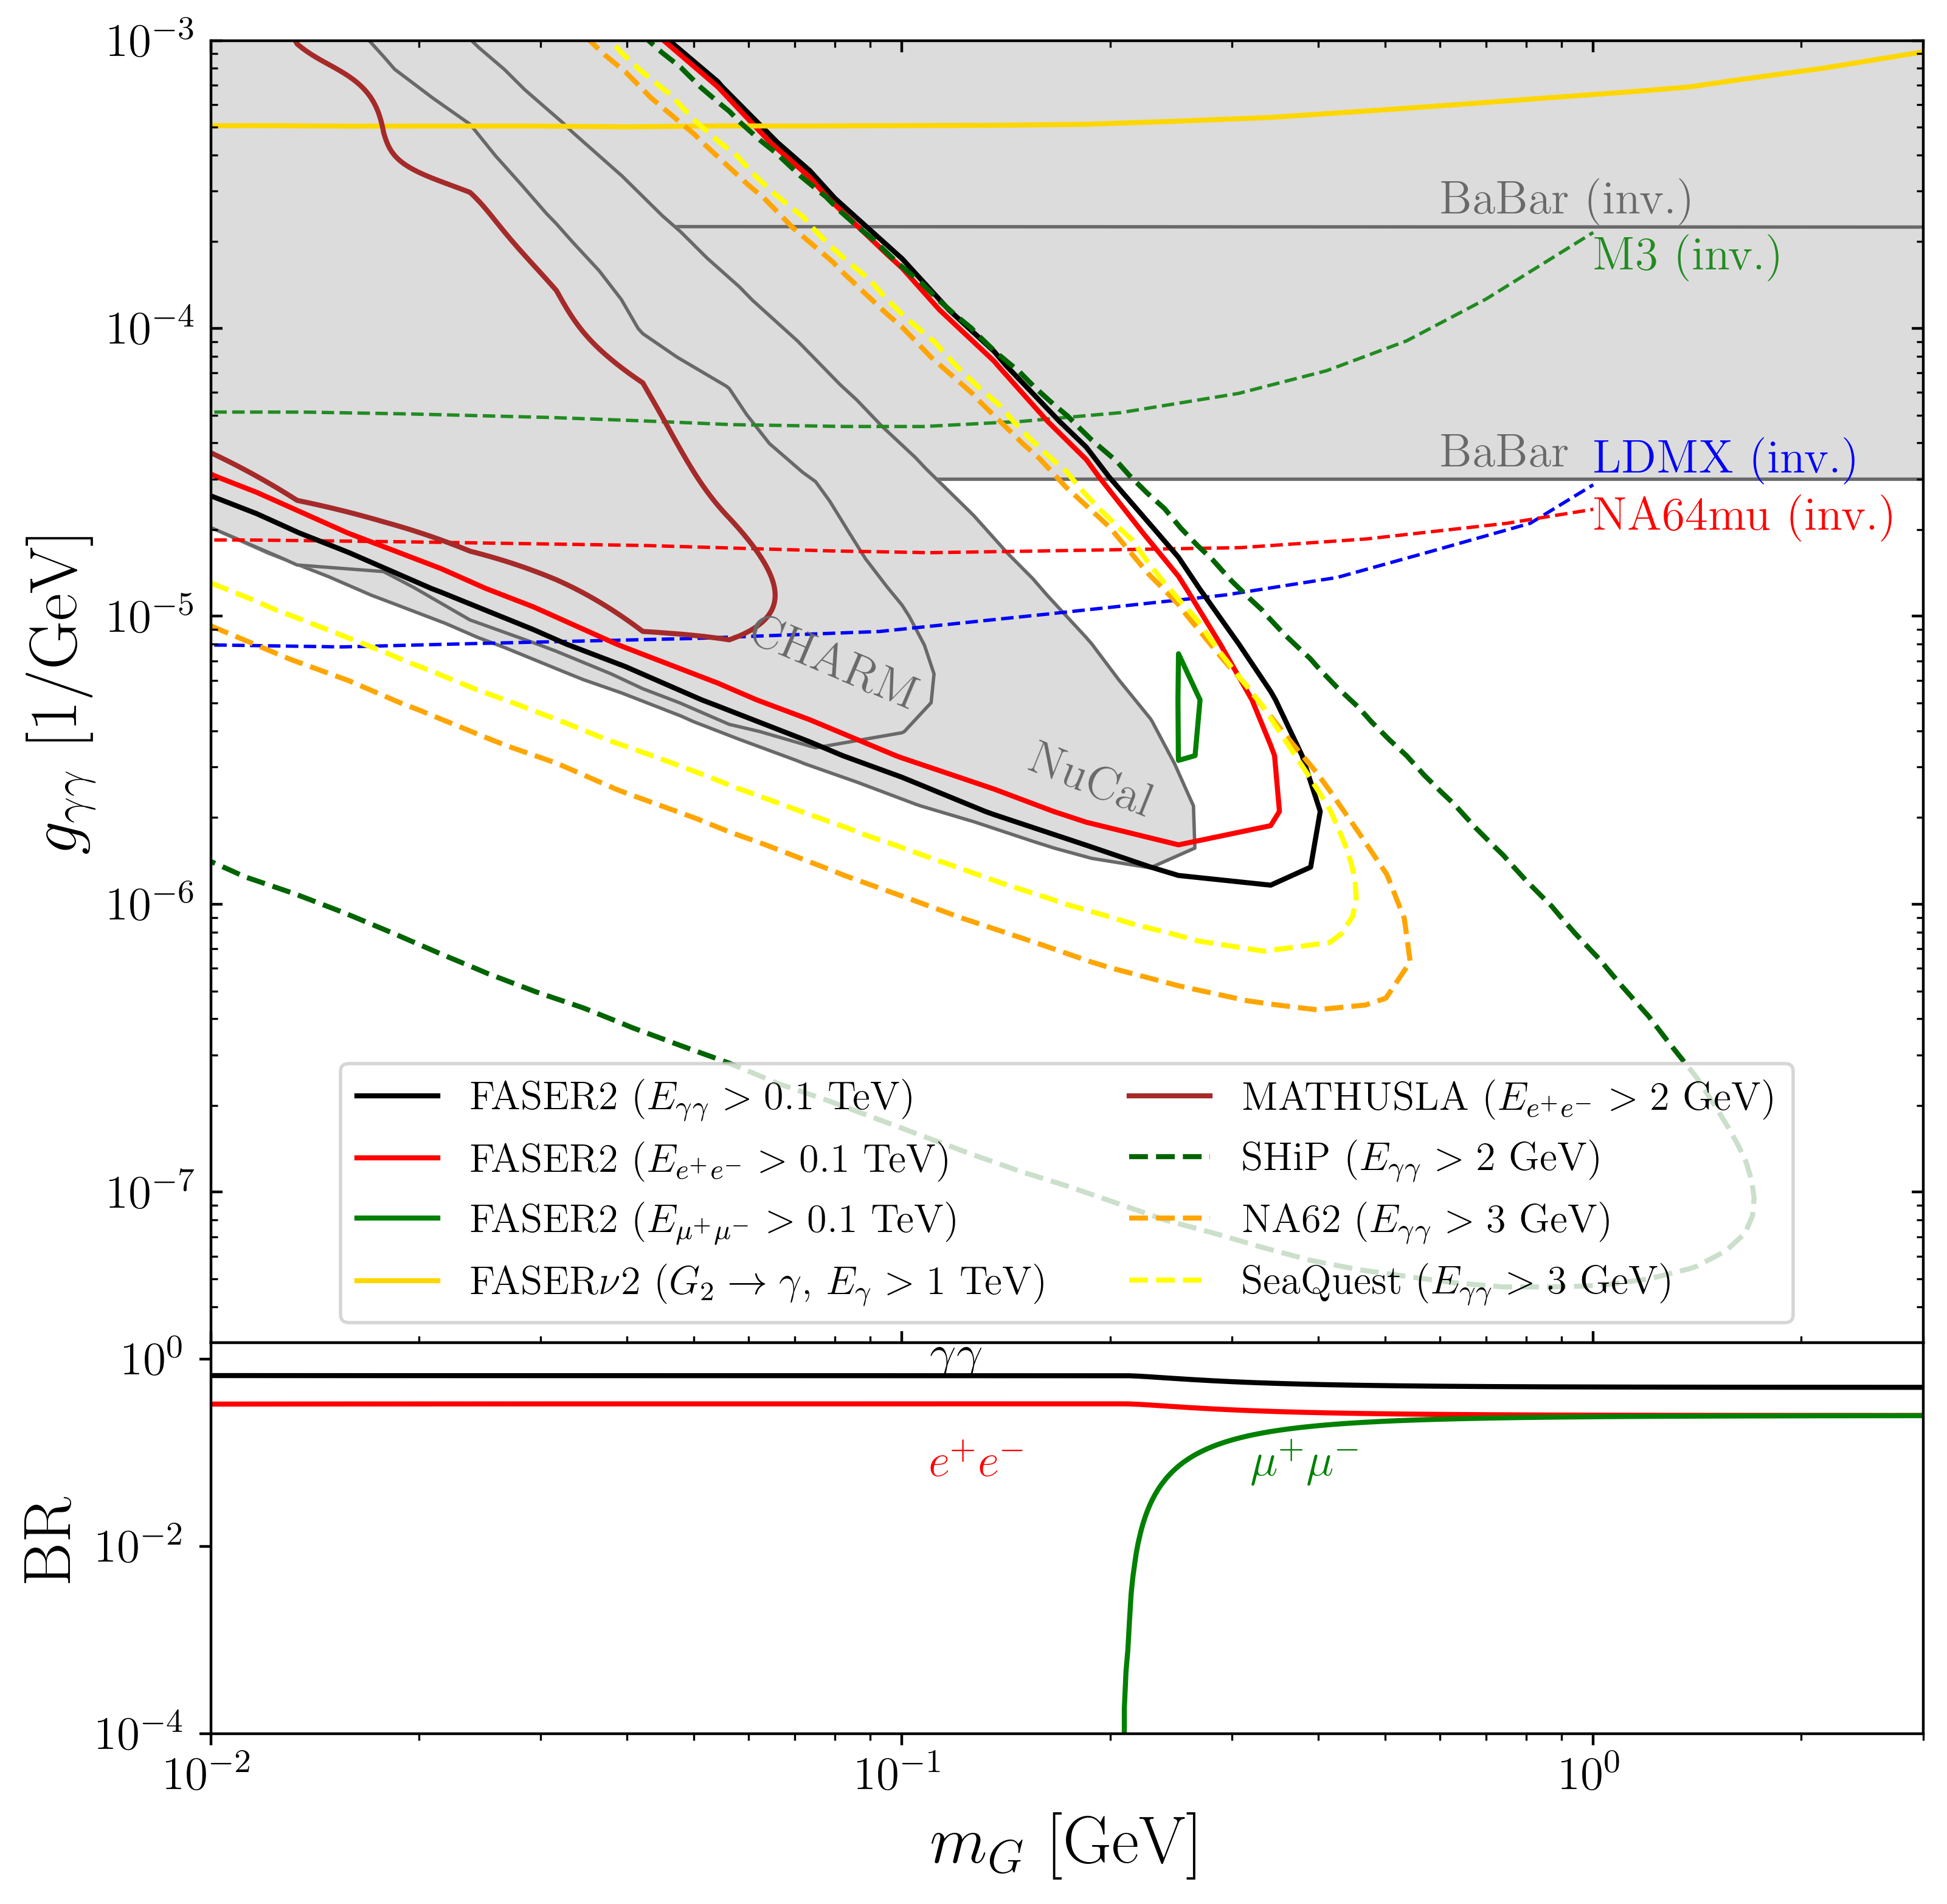

In [26]:
plt, ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    xlims=[1e-2, 3],
    ylims=[3*10**-8, 10**-3],
    xlabel=r"$m_{G}$ [GeV]",
    ylabel=r"$g_{\gamma \gamma}$\  [1/GeV]",
    legendloc=(1.00, 0.28),
    branchings=branchings,
    figsize=(8, 8),
    save_file=True
)

# ax.legend(frameon=False, loc='best', ncol=2, fontsize=12)
ax.legend(frameon=1, loc='lower center', ncol=2, fontsize=12)
plt.subplots_adjust(left=0.11, right=0.99, bottom=0.10, top=0.97)

plt.savefig("./output/G2_noFPF.pdf")
plt.show()

###  FPF

Now let's plot the results. We first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [27]:
setups = [
    [ "14TeV_FPF_FASER2_gg.npy", r"FPF FASER2 ($E_{\gamma\gamma}> 0.1$ TeV)", "black", "solid", 0., 3.0 ], 
    [ "14TeV_FPF_FASER2_ee.npy", r"FPF FASER2 ($E_{e^+ e^-}> 0.1$ TeV)", "red", "solid", 0., 3.0 ], 
    [ "14TeV_FPF_FASER2_mumu.npy", r"FPF FASER2 ($E_{\mu^+ \mu^-}> 0.1$ TeV)", "green", "solid", 0., 3.0 ], 

    [ "14TeV_FPF_FASERnu2_photon_conversion.npy", r"FPF FASER$\nu$2 ($G_2 \to \gamma$, $E_{\gamma}> 1$ TeV)", "gold", "solid", 0., 3 ],

    [ "14TeV_FPF_FLARE_photon_conversion.npy", r"FLArE ($G_2 \to \gamma$, $E_{\gamma}> 1$ GeV)", "gold", "dashed", 0., 3 ],

    [ "0.4TeV_SHiP_gg.npy", r"SHiP ($E_{\gamma \gamma}> 2$ GeV)", "darkgreen", "dashed", 0., 3 * 2 ],

    [ "0.4TeV_NA62_gg.npy", r"NA62 ($E_{\gamma \gamma}> 3$ GeV)", "orange", "dashed", 0., 3.6],

    # [ "0.4TeV_NA62_gg.npy", r"NA62 ($E_{\gamma \gamma}> 3$ GeV)", "orange", "dashed", 0., 3.6 * 6],

    # [ "0.4TeV_SHiP_gg.npy", r"SHiP ($E_{\gamma \gamma}> 2$ GeV)", "darkgreen", "dashed", 0., 3 * 3 ],
    # # [ "0.4TeV_SHiP_ee.npy", r"SHiP ($E_{e^+ e^-}> 2$ GeV)", "darkgreen", "dashed", 0., 3 ],
    # # [ "0.4TeV_SHiP_mumu.npy", r"SHiP mumu", "green", "dotted", 0., 3 ],

    [ "0.12TeV_SeaQuest_gg.npy", r"SeaQuest ($E_{\gamma \gamma}> 3$ GeV)", "yellow", "dashed", 0., 3.6],
]

In [28]:
bounds = [
    ["BABAR.txt", "BaBar", 0.60215, 3.3e-5, 0],
    ["BABAR_invisible.txt", "BaBar (inv.)", 0.60215, 25.0e-5, 0],
    ["0.069TeV_NuCal_gg.npy.txt", "NuCal", 0.15, 1.99e-6, -22],
    ["0.4TeV_CHARM_gg.npy.txt", "CHARM", 0.059, 4.7e-6, -23],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [29]:
projections = [
    [ "M3.txt", "forestgreen", "M3 (inv.)", 1.00285, 16e-5, 0 ],
    [ "LDMX.txt", "blue", "LDMX (inv.)", 1.00285, 3.15e-5, 0 ],
    [ "NA64mu.txt", "red", "NA64mu (inv.)", 1.00285, 2e-5, 0 ],
]

Finally, we can plot everything using `foresee.plot_reach()`. It returns a matplotlib instance, to which we can add further lines and which we can show or save. Below, we add the dark matter relict target line for a specific benchmark.

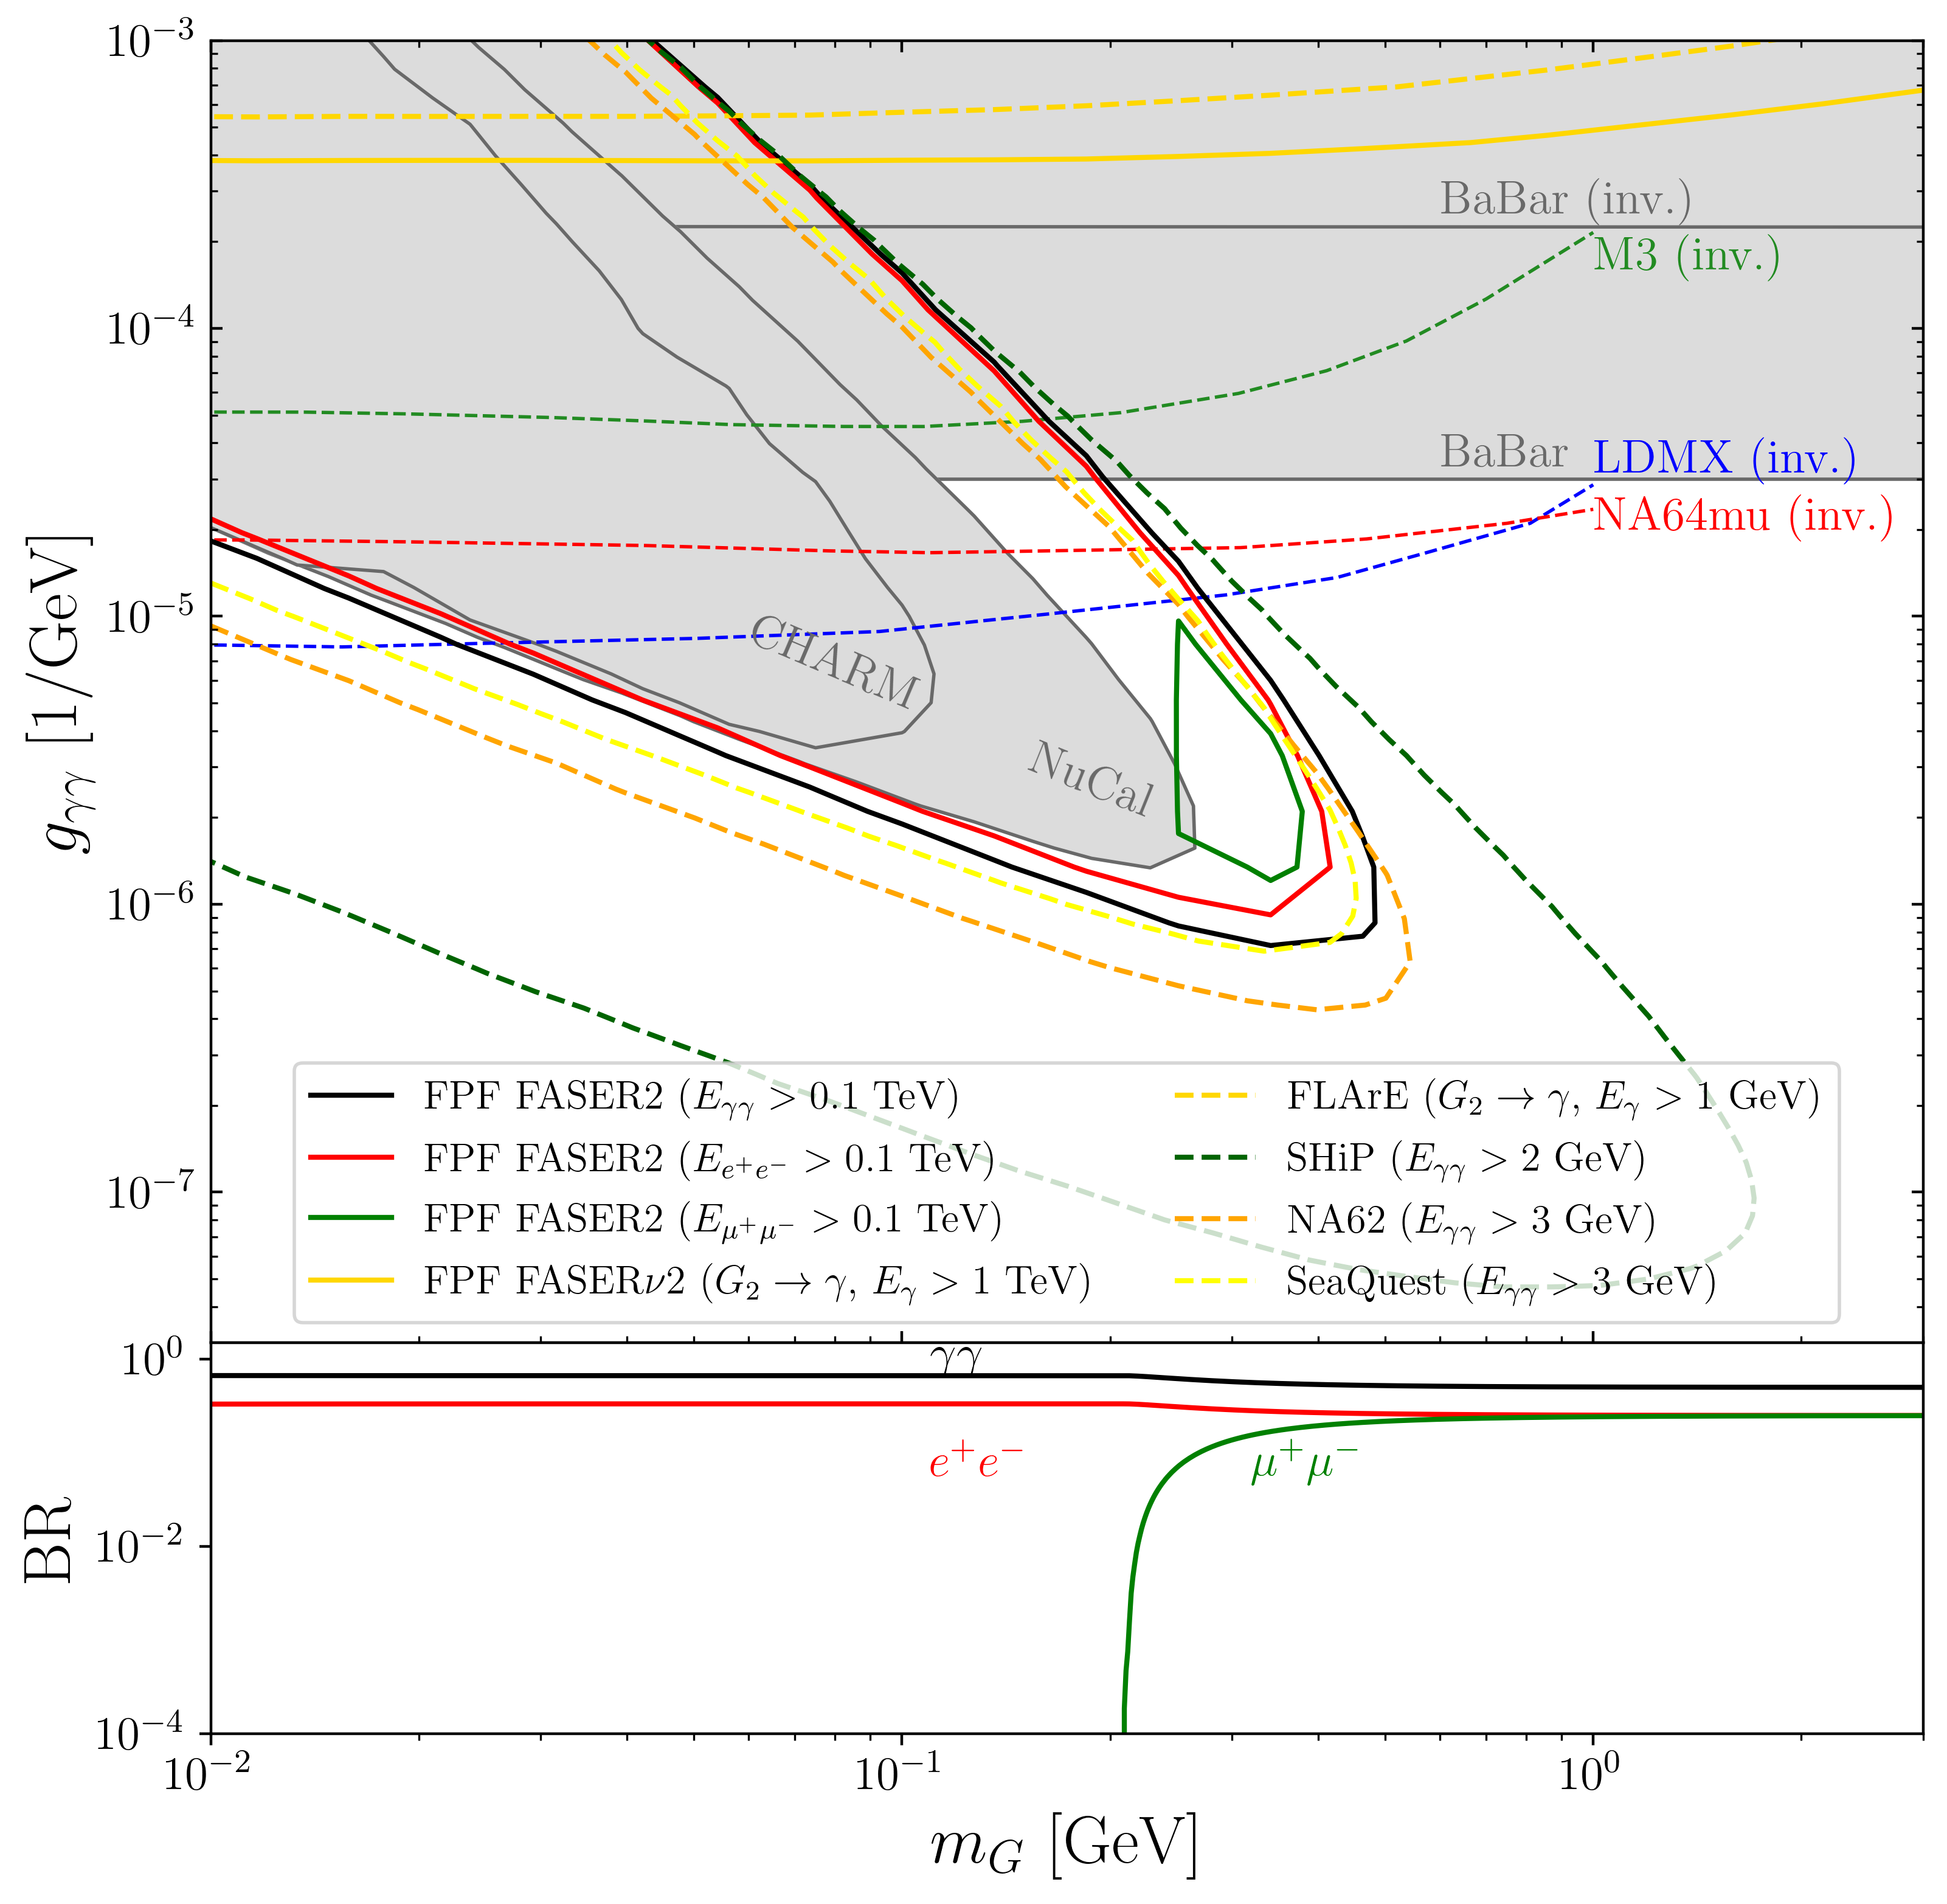

In [30]:
plt, ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    xlims=[1e-2, 3],
    ylims=[3*10**-8, 10**-3],
    xlabel=r"$m_{G}$ [GeV]",
    ylabel=r"$g_{\gamma \gamma}$\  [1/GeV]",
    legendloc=(1.00, 0.28),
    branchings=branchings,
    figsize=(8, 8),
    save_file=True
)

# ax.legend(frameon=False, loc='best', ncol=2, fontsize=12)
ax.legend(frameon=1, loc='lower center', ncol=2, fontsize=12)
plt.subplots_adjust(left=0.11, right=0.99, bottom=0.10, top=0.97)

plt.savefig("./output/G2_FPF.pdf")
plt.show()